# Examples and Exercises from Think Stats, 2nd Edition

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT


In [1]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np
import pandas as pd

import random

import thinkstats2
import thinkplot

## Multiple regression

Let's load up the NSFG data again.

In [2]:
import first

live, firsts, others = first.MakeFrames()

Here's birth weight as a function of mother's age (which we saw in the previous chapter).

In [3]:
import statsmodels.formula.api as smf

formula = 'totalwgt_lb ~ agepreg'
model = smf.ols(formula, data=live)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            totalwgt_lb   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     43.02
Date:                Thu, 17 Oct 2019   Prob (F-statistic):           5.72e-11
Time:                        21:52:05   Log-Likelihood:                -15897.
No. Observations:                9038   AIC:                         3.180e+04
Df Residuals:                    9036   BIC:                         3.181e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.8304      0.068    100.470      0.000       6.697       6.964
agepreg        0.0175      0.003      6.559      0.000       0.012       0.023
==============================================================================
Omnibus:                     1024.052   Durbin-Watson:                   1.618
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3081.833
Skew:                          -0.601   Prob(JB):                         0.00
Kurtosis:                       5.596   Cond. No.                         118.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can extract the parameters.

In [4]:
inter = results.params['Intercept']
slope = results.params['agepreg']
inter, slope

(6.830396973311053, 0.017453851471802666)

And the p-value of the slope estimate.

In [5]:
slope_pvalue = results.pvalues['agepreg']
slope_pvalue

5.7229471073160504e-11

And the coefficient of determination.

In [6]:
results.rsquared

0.004738115474710036

The difference in birth weight between first babies and others.

In [7]:
diff_weight = firsts.totalwgt_lb.mean() - others.totalwgt_lb.mean()
diff_weight

-0.12476118453549034

The difference in age between mothers of first babies and others.

In [8]:
diff_age = firsts.agepreg.mean() - others.agepreg.mean()
diff_age

-3.5864347661500275

The age difference plausibly explains about half of the difference in weight.

In [9]:
slope * diff_age

-0.0625970997216919

Running a single regression with a categorical variable, `isfirst`:

In [10]:
live['isfirst'] = live.birthord == 1
formula = 'totalwgt_lb ~ isfirst'
results = smf.ols(formula, data=live).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            totalwgt_lb   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     17.74
Date:                Thu, 17 Oct 2019   Prob (F-statistic):           2.55e-05
Time:                        21:52:06   Log-Likelihood:                -15909.
No. Observations:                9038   AIC:                         3.182e+04
Df Residuals:                    9036   BIC:                         3.184e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           7.3259      0.021    356.007      0.000       7.286       7.366
isfirst[T.True]    -0.1248      0.030     -4.212      0.000      -0.183      -0.067
==============================================================================
Omnibus:                      988.919   Durbin-Watson:                   1.613
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2897.107
Skew:                          -0.589   Prob(JB):                         0.00
Kurtosis:                       5.511   Cond. No.                         2.58
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Now finally running a multiple regression:

In [11]:
formula = 'totalwgt_lb ~ isfirst + agepreg'
results = smf.ols(formula, data=live).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            totalwgt_lb   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     24.02
Date:                Thu, 17 Oct 2019   Prob (F-statistic):           3.95e-11
Time:                        21:52:06   Log-Likelihood:                -15894.
No. Observations:                9038   AIC:                         3.179e+04
Df Residuals:                    9035   BIC:                         3.182e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           6.9142      0.078     89.073      0.000       6.762       7.066
isfirst[T.True]    -0.0698      0.031     -2.236      0.025      -0.131      -0.009
agepreg             0.0154      0.003      5.499      0.000       0.010       0.021
==============================================================================
Omnibus:                     1019.945   Durbin-Watson:                   1.618
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3063.682
Skew:                          -0.599   Prob(JB):                         0.00
Kurtosis:                       5.588   Cond. No.                         137.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As expected, when we control for mother's age, the apparent difference due to `isfirst` is cut in half.

If we add age squared, we can control for a quadratic relationship between age and weight.

In [12]:
live['agepreg2'] = live.agepreg**2
formula = 'totalwgt_lb ~ isfirst + agepreg + agepreg2'
results = smf.ols(formula, data=live).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            totalwgt_lb   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     22.64
Date:                Thu, 17 Oct 2019   Prob (F-statistic):           1.35e-14
Time:                        21:52:06   Log-Likelihood:                -15884.
No. Observations:                9038   AIC:                         3.178e+04
Df Residuals:                    9034   BIC:                         3.181e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           5.6923      0.286     19.937      0.000       5.133       6.252
isfirst[T.True]    -0.0504      0.031     -1.602      0.109      -0.112       0.011
agepreg             0.1124      0.022      5.113      0.000       0.069       0.155
agepreg2           -0.0018      0.000     -4.447      0.000      -0.003      -0.001
==============================================================================
Omnibus:                     1007.149   Durbin-Watson:                   1.616
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3003.343
Skew:                          -0.594   Prob(JB):                         0.00
Kurtosis:                       5.562   Cond. No.                     1.39e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
import scipy.stats
scipy.stats.t.sf(1.602, 9038)*2

0.10919055625329209

When we do that, the apparent effect of `isfirst` gets even smaller, and is no longer statistically significant.

These results suggest that the apparent difference in weight between first babies and others might be explained by difference in mothers' ages, at least in part.

## Data Mining

We can use `join` to combine variables from the preganancy and respondent tables.

In [14]:
import nsfg

live = live[live.prglngth>30]
resp = nsfg.ReadFemResp()
resp.index = resp.caseid
join = live.join(resp, on='caseid', rsuffix='_r')

And we can search for variables with explanatory power.

Because we don't clean most of the variables, we are probably missing some good ones.

In [15]:
import patsy

def GoMining(df):
    """Searches for variables that predict birth weight.

    df: DataFrame of pregnancy records

    returns: list of (rsquared, variable name) pairs
    """
    variables = []
    for name in df.columns:
        try:
            if df[name].var() < 1e-7:
                continue

            formula = 'totalwgt_lb ~ agepreg + ' + name
            
            # The following seems to be required in some environments
            # formula = formula.encode('ascii')

            model = smf.ols(formula, data=df)
            if model.nobs < len(df)/2:
                continue

            results = model.fit()
        except (ValueError, TypeError):
            continue

        variables.append((results.rsquared, name))

    return variables

In [16]:
variables = GoMining(join)

The following functions report the variables with the highest values of $R^2$.

In [17]:
import re

def ReadVariables():
    """Reads Stata dictionary files for NSFG data.

    returns: DataFrame that maps variables names to descriptions
    """
    vars1 = thinkstats2.ReadStataDct('2002FemPreg.dct').variables
    vars2 = thinkstats2.ReadStataDct('2002FemResp.dct').variables

    all_vars = vars1.append(vars2)
    all_vars.index = all_vars.name
    return all_vars

def MiningReport(variables, n=30):
    """Prints variables with the highest R^2.

    t: list of (R^2, variable name) pairs
    n: number of pairs to print
    """
    all_vars = ReadVariables()

    variables.sort(reverse=True)
    for r2, name in variables[:n]:
        key = re.sub('_r$', '', name)
        try:
            desc = all_vars.loc[key].desc
            if isinstance(desc, pd.Series):
                desc = desc[0]
            print(name, r2, desc)
        except (KeyError, IndexError):
            print(name, r2)

Some of the variables that do well are not useful for prediction because they are not known ahead of time.

In [18]:
MiningReport(variables)

totalwgt_lb 1.0
birthwgt_lb 0.9498127305978009 BD-3 BIRTHWEIGHT IN POUNDS - 1ST BABY FROM THIS PREGNANCY
lbw1 0.3008240784470766 LOW BIRTHWEIGHT - BABY 1
prglngth 0.13012519488625085 DURATION OF COMPLETED PREGNANCY IN WEEKS
wksgest 0.12340041363361032 GESTATIONAL LENGTH OF COMPLETED PREGNANCY (IN WEEKS)
agecon 0.10203149928156019 AGE AT TIME OF CONCEPTION
mosgest 0.02714427463957947 GESTATIONAL LENGTH OF COMPLETED PREGNANCY (IN MONTHS)
babysex 0.018550925293942422 BD-2 SEX OF 1ST LIVEBORN BABY FROM THIS PREGNANCY
race_r 0.016199503586252773
race 0.016199503586252773
nbrnaliv 0.016017752709788335 BC-2 NUMBER OF BABIES BORN ALIVE FROM THIS PREGNANCY
paydu 0.014003795578115041 IB-10 CURRENT LIVING QUARTERS OWNED/RENTED, ETC
rmarout03 0.013430066465713542 INFORMAL MARITAL STATUS WHEN PREGNANCY ENDED - 3RD
birthwgt_oz 0.013102457615706165 BD-3 BIRTHWEIGHT IN OUNCES - 1ST BABY FROM THIS PREGNANCY
anynurse 0.012529022541810653 BH-1 WHETHER R BREASTFED THIS CHILD AT ALL - 1ST FROM THIS PREG
bf

Combining the variables that seem to have the most explanatory power.

In [19]:
formula = ('totalwgt_lb ~ agepreg + C(race) + babysex==1 + '
               'nbrnaliv>1 + paydu==1 + totincr')
results = smf.ols(formula, data=join).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            totalwgt_lb   R-squared:                       0.060
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     79.98
Date:                Thu, 17 Oct 2019   Prob (F-statistic):          4.86e-113
Time:                        21:53:23   Log-Likelihood:                -14295.
No. Observations:                8781   AIC:                         2.861e+04
Df Residuals:                    8773   BIC:                         2.866e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                6.6303      0.065    102.223      0.000       6.503       6.757
C(race)[T.2]             0.3570      0.032     11.215      0.000       0.295       0.419
C(race)[T.3]             0.2665      0.051      5.175      0.000       0.166       0.367
babysex == 1[T.True]     0.2952      0.026     11.216      0.000       0.244       0.347
nbrnaliv > 1[T.True]    -1.3783      0.108    -12.771      0.000      -1.590      -1.167
paydu == 1[T.True]       0.1196      0.031      3.861      0.000       0.059       0.180
agepreg                  0.0074      0.003      2.921      0.004       0.002       0.012
totincr                  0.0122      0.004      3.110      0.002       0.005       0.020
==============================================================================
Omnibus:                      398.813   Durbin-Watson:                   1.604
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1388.362
Skew:                          -0.037   Prob(JB):                    3.32e-302
Kurtosis:                       4.947   Cond. No.                         221.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Logistic regression

Example: suppose we are trying to predict `y` using explanatory variables `x1` and `x2`.

In [20]:
y = np.array([0, 1, 0, 1])
x1 = np.array([0, 0, 0, 1])
x2 = np.array([0, 1, 1, 1])

According to the logit model the log odds for the $i$th element of $y$ is

$\log o = \beta_0 + \beta_1 x_1 + \beta_2 x_2 $

So let's start with an arbitrary guess about the elements of $\beta$:



In [21]:
beta = [-1.5, 2.8, 1.1]

Plugging in the model, we get log odds.

In [22]:
log_o = beta[0] + beta[1] * x1 + beta[2] * x2
log_o

array([-1.5, -0.4, -0.4,  2.4])

Which we can convert to odds.

In [23]:
o = np.exp(log_o)
o

array([ 0.22313016,  0.67032005,  0.67032005, 11.02317638])

And then convert to probabilities.

In [24]:
p = o / (o+1)
p

array([0.18242552, 0.40131234, 0.40131234, 0.9168273 ])

The likelihoods of the actual outcomes are $p$ where $y$ is 1 and $1-p$ where $y$ is 0. 

In [25]:
likes = np.where(y, p, 1-p)
likes

array([0.81757448, 0.40131234, 0.59868766, 0.9168273 ])

The likelihood of $y$ given $\beta$ is the product of `likes`:

In [26]:
like = np.prod(likes)
like

0.1800933529673034

Logistic regression works by searching for the values in $\beta$ that maximize `like`.

Here's an example using variables in the NSFG respondent file to predict whether a baby will be a boy or a girl.

In [27]:
import first
live, firsts, others = first.MakeFrames()
live = live[live.prglngth>30]
live['boy'] = (live.babysex==1).astype(int)

The mother's age seems to have a small effect.

In [28]:
model = smf.logit('boy ~ agepreg', data=live)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.693015
         Iterations 3


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    boy   No. Observations:                 8884
Model:                          Logit   Df Residuals:                     8882
Method:                           MLE   Df Model:                            1
Date:                Thu, 17 Oct 2019   Pseudo R-squ.:               6.144e-06
Time:                        21:53:27   Log-Likelihood:                -6156.7
converged:                       True   LL-Null:                       -6156.8
Covariance Type:            nonrobust   LLR p-value:                    0.7833
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0058      0.098      0.059      0.953      -0.185       0.197
agepreg        0.0010      0.004      0.275      0.783      -0.006       0.009
==============================================================================
"""

Here are the variables that seemed most promising.

In [29]:
formula = 'boy ~ agepreg + hpagelb + birthord + C(race)'
model = smf.logit(formula, data=live)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.692944
         Iterations 3


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    boy   No. Observations:                 8782
Model:                          Logit   Df Residuals:                     8776
Method:                           MLE   Df Model:                            5
Date:                Thu, 17 Oct 2019   Pseudo R-squ.:               0.0001440
Time:                        21:53:27   Log-Likelihood:                -6085.4
converged:                       True   LL-Null:                       -6086.3
Covariance Type:            nonrobust   LLR p-value:                    0.8822
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0301      0.104     -0.290      0.772      -0.234       0.173
C(race)[T.2]    -0.0224      0.051     -0.439      0.660      -0.122       0.077
C(race)[T.3]    -0.0005      0.083     -0.005      0.996      -0.163       0.162
agepreg         -0.0027      0.006     -0.484      0.629      -0.014       0.008
hpagelb          0.0047      0.004      1.112      0.266      -0.004       0.013
birthord         0.0050      0.022      0.227      0.821      -0.038       0.048
================================================================================
"""

To make a prediction, we have to extract the exogenous and endogenous variables.

In [30]:
endog = pd.DataFrame(model.endog, columns=[model.endog_names])
exog = pd.DataFrame(model.exog, columns=model.exog_names)

The baseline prediction strategy is to guess "boy".  In that case, we're right almost 51% of the time.

In [31]:
actual = endog['boy']
baseline = actual.mean()
baseline

0.507173764518333

If we use the previous model, we can compute the number of predictions we get right.

In [32]:
predict = (results.predict() >= 0.5)
true_pos = predict * actual
true_neg = (1 - predict) * (1 - actual)
sum(true_pos), sum(true_neg)

(3944.0, 548.0)

And the accuracy, which is slightly higher than the baseline.

In [33]:
acc = (sum(true_pos) + sum(true_neg)) / len(actual)
acc

0.5115007970849464

To make a prediction for an individual, we have to get their information into a `DataFrame`.

In [34]:
columns = ['agepreg', 'hpagelb', 'birthord', 'race']
new = pd.DataFrame([[35, 39, 3, 2]], columns=columns)
y = results.predict(new)
y

0    0.513091
dtype: float64

This person has a 51% chance of having a boy (according to the model).

## Exercises

**Exercise:** Suppose one of your co-workers is expecting a baby and you are participating in an office pool to predict the date of birth. Assuming that bets are placed during the 30th week of pregnancy, what variables could you use to make the best prediction? You should limit yourself to variables that are known before the birth, and likely to be available to the people in the pool.

In [35]:
import first
live, firsts, others = first.MakeFrames()
live = live[live.prglngth>30]

The following are the only variables I found that have a statistically significant effect on pregnancy length.

In [36]:
import statsmodels.formula.api as smf
model = smf.ols('prglngth ~ birthord==1 + race==2 + nbrnaliv>1', data=live)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               prglngth   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     34.28
Date:                Thu, 17 Oct 2019   Prob (F-statistic):           5.09e-22
Time:                        21:53:31   Log-Likelihood:                -18247.
No. Observations:                8884   AIC:                         3.650e+04
Df Residuals:                    8880   BIC:                         3.653e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                38.7617      0.039   1006.410      0.000      38.686      38.837
birthord == 1[T.True]     0.1015      0.040      2.528      0.011       0.023       0.180
race == 2[T.True]         0.1390      0.042      3.311      0.001       0.057       0.221
nbrnaliv > 1[T.True]     -1.4944      0.164     -9.086      0.000      -1.817      -1.172
==============================================================================
Omnibus:                     1587.470   Durbin-Watson:                   1.619
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6160.751
Skew:                          -0.852   Prob(JB):                         0.00
Kurtosis:                       6.707   Cond. No.                         10.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Exercise:** The Trivers-Willard hypothesis suggests that for many mammals the sex ratio depends on “maternal condition”; that is, factors like the mother’s age, size, health, and social status. See https://en.wikipedia.org/wiki/Trivers-Willard_hypothesis

Some studies have shown this effect among humans, but results are mixed. In this chapter we tested some variables related to these factors, but didn’t find any with a statistically significant effect on sex ratio.

As an exercise, use a data mining approach to test the other variables in the pregnancy and respondent files. Can you find any factors with a substantial effect?

In [37]:
import regression
join = regression.JoinFemResp(live)

In [38]:
#ThinkStats2: "“sex ratio” is conventionally defined to be the probability of having a boy."

#ThinkStats2: "logit requires the dependent variable to be binary (rather than boolean), 
# so I create a new column named boy, using astype(int) to convert to binary integers:"

join['boy'] = (join.babysex==1).astype(int)

In [39]:
formula = 'boy ~ agepreg'
model = smf.logit(formula, data=join)
results = model.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.693015
         Iterations 3


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    boy   No. Observations:                 8884
Model:                          Logit   Df Residuals:                     8882
Method:                           MLE   Df Model:                            1
Date:                Thu, 17 Oct 2019   Pseudo R-squ.:               6.144e-06
Time:                        21:54:05   Log-Likelihood:                -6156.7
converged:                       True   LL-Null:                       -6156.8
Covariance Type:            nonrobust   LLR p-value:                    0.7833
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0058      0.098      0.059      0.953      -0.185       0.197
agepreg        0.0010      0.004      0.275      0.783      -0.006       0.009
==============================================================================
"""

In [40]:
# Solution goes here

def GoMining_test(df):
    """Searches for variables that predict birth weight.

    df: DataFrame of pregnancy records

    returns: list of (rsquared, variable name) pairs
    """
    variables = []
    for name in df.columns:
        try:
            if df[name].var() < 1e-7:
                continue

            formula='boy ~ ' + name
            
            # The following seems to be required in some environments
            # formula = formula.encode('ascii')

            model = smf.logit(formula, data=df)


            #making sure there are enough values for computation?
            nobs = len(model.endog)
            if nobs < len(df)/2:
                continue
            
            results = model.fit()
            
        except: #changing except to any type of error from (ValueError, TypeError) in example
            continue

        # recording the pseudo r-squared from the model fit
        variables.append((results.prsquared, name))

    return variables

variables = GoMining_test(join)

Optimization terminated successfully.
         Current function value: 0.692996
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.692962
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.692850
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.693001
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.692903
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.692766
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.693019
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.692995
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.693017
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.692989
  

Optimization terminated successfully.
         Current function value: 0.692955
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.693013
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.692895
         Iterations 5
         Current function value: 0.692784
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.692643
         Iterations 6


/opt/local/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.693019
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.692840
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.692975
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.692989
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.692975
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.693007
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.693002
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.693019
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.692978
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.692977
  

Optimization terminated successfully.
         Current function value: 0.693056
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.693127
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.693128
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.692964
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.692801
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.693079
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.692966
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.692998
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.693018
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.693011
  

Optimization terminated successfully.
         Current function value: 0.692744
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.693017
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.693012
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.693017
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.692965
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.692981
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.692857
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.692948
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.692960
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.692923
  

Optimization terminated successfully.
         Current function value: 0.693006
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.692998
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.692993
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.693015
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.693006
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.692988
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.692967
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.692996
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.692819
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.692982
  

Optimization terminated successfully.
         Current function value: 0.692988
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.692934
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.692629
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.692782
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.692888
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.692739
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.692673
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.692624
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.692795
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.692927
  

Optimization terminated successfully.
         Current function value: 0.692996
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.692952
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.692951
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.692996
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.693019
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.693016
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.692985
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.692994
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.693016
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.692997
  

Optimization terminated successfully.
         Current function value: 0.692971
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.693013
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.692863
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.693014
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.692929
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.692973
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.692987
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.693002
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.693002
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.692899
  

Optimization terminated successfully.
         Current function value: 0.692976
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.693061
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.693125
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.692804
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.693014
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.692997
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.692817
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.692993
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.692885
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.692844
  

/opt/local/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.692987
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.692978
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.692964
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.693010
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.692999
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.693005
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.693018
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.692960
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.693019
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.692987
  

/opt/local/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.692673
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.692917
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.692807
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.693018
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.692838
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.693033
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.693017
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.692902
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.692770
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.692993
  

Optimization terminated successfully.
         Current function value: 0.693002
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.693016
         Iterations 3
         Current function value: 0.692943
         Iterations: 35
Optimization terminated successfully.
         Current function value: 0.693007
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.692832
         Iterations 3


/opt/local/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.693002
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.693008
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.693002
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.692795
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.692693
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.692460
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.692822
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.693005
         Iterations 3
Optimization terminated successfully.
         Current function value: 0.693015
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.692993
  

In [41]:
MiningReport(variables,n=10)

totalwgt_lb 0.009672005414744111
birthwgt_lb 0.009248981696271863 BD-3 BIRTHWEIGHT IN POUNDS - 1ST BABY FROM THIS PREGNANCY
constat3 0.0010867058511311312 3RD PRIORITY CODE FOR CURRENT CONTRACEPTIVE STATUS
lbw1 0.0010485954907972772 LOW BIRTHWEIGHT - BABY 1
nplaced 0.0010069185324943497 # OF R'S BIO CHILDREN SHE PLACED FOR ADOPTION (BASED ON BPA)
infever 0.0008069106229559031 EVER USED INFERTILITY SERVICES OF ANY KIND
frsteatd 0.0007600842068937741 AGE (IN MOS) WHEN 1ST SUPPLEMENTED - 1ST FROM THIS PREG
splstwk1 0.0007317461972905503 IF-1 H/P DOING WHAT LAST WEEK (EMPLOYMENT STATUS) 1ST MENTION
outcom02 0.0006987412942979221 OUTCOME OF PREGNANCY - 2ND
fmarout5 0.0006819962814968994 FORMAL MARITAL STATUS AT PREGNANCY OUTCOME


In [42]:
# Solution goes here

#putting together the most likely formula for gender ratio based on variables known during pregnancy
#formula = ('boy ~ nplaced + fmarout5==5 + infever')
formula = ('boy ~ nplaced + fmarout5 + infever')
results = smf.logit(formula, data=join).fit()
results.summary()

#NB: rmarout6==6 taken out because p-val = 0.992

#Interpretation: overall R^2 is very low... this model does not seem to have much predictive ability...
# but, example model fit to data set also had a low R^2 ?

Optimization terminated successfully.
         Current function value: 0.691101
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    boy   No. Observations:                 8884
Model:                          Logit   Df Residuals:                     8880
Method:                           MLE   Df Model:                            3
Date:                Thu, 17 Oct 2019   Pseudo R-squ.:                0.002768
Time:                        21:54:58   Log-Likelihood:                -6139.7
converged:                       True   LL-Null:                       -6156.8
Covariance Type:            nonrobust   LLR p-value:                 1.901e-07
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3601      0.122      2.940      0.003       0.120       0.600
nplaced       -1.8625      0.624     -2.983      0.003      -3.086      -0.639
fmarout5       0.0392      0.011      3.482      0.000       0.017       0.061
infever       -0.2274      0.065     -3.521      0.000      -0.354      -0.101
==============================================================================
"""

In [43]:
formula = ('boy ~ nplaced + fmarout5==5 + infever')
results = smf.logit(formula, data=join).fit()
results.summary()


Optimization terminated successfully.
         Current function value: 0.691232
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    boy   No. Observations:                 8884
Model:                          Logit   Df Residuals:                     8880
Method:                           MLE   Df Model:                            3
Date:                Thu, 17 Oct 2019   Pseudo R-squ.:                0.002580
Time:                        21:54:58   Log-Likelihood:                -6140.9
converged:                       True   LL-Null:                       -6156.8
Covariance Type:            nonrobust   LLR p-value:                 5.870e-07
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.4053      0.122      3.329      0.001       0.167       0.644
fmarout5 == 5[T.True]     0.1390      0.044      3.131      0.002       0.052       0.226
nplaced                  -1.8539      0.624     -2.969      0.003      -3.078      -0.630
infever                  -0.2252      0.065     -3.485      0.000      -0.352      -0.099
=========================================================================================
"""

**Exercise:** If the quantity you want to predict is a count, you can use Poisson regression, which is implemented in StatsModels with a function called `poisson`. It works the same way as `ols` and `logit`. As an exercise, let’s use it to predict how many children a woman has born; in the NSFG dataset, this variable is called `numbabes`.

Suppose you meet a woman who is 35 years old, black, and a college graduate whose annual household income exceeds $75,000. How many children would you predict she has born?

In [44]:
# Solution goes here

formula = ('numbabes ~ age_r + C(race) + educat + totincr')
results = smf.poisson(formula, data=join).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 1.687055
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Poisson Regression Results                          
==============================================================================
Dep. Variable:               numbabes   No. Observations:                 8884
Model:                        Poisson   Df Residuals:                     8878
Method:                           MLE   Df Model:                            5
Date:                Thu, 17 Oct 2019   Pseudo R-squ.:                 0.03109
Time:                        21:54:58   Log-Likelihood:                -14988.
converged:                       True   LL-Null:                       -15469.
Covariance Type:            nonrobust   LLR p-value:                1.106e-205
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.0842      0.045     23.995      0.000       0.996       1.173
C(race)[T.2]    -0.1398      0.015     -9.464      0.000      -0.169      -0.111
C(race)[T.3]    -0.0914      0.025     -3.717      0.000      -0.140      -0.043
age_r            0.0208      0.001     20.474      0.000       0.019       0.023
educat          -0.0443      0.003    -15.139      0.000      -0.050      -0.039
totincr         -0.0179      0.002     -9.442      0.000      -0.022      -0.014
================================================================================
"""

Now we can predict the number of children for a woman who is 35 years old, black, and a college
graduate whose annual household income exceeds $75,000

In [45]:
# Solution goes here

import pandas

columns = ['age_r', 'race', 'educat', 'totincr']
#educat=16: 4 YEARS OF COLLEGE/GRAD SCHOOL
#totincr=14: $75,000 OR MORE 
#race=1: Black
new = pandas.DataFrame([[35, 1, 16, 14]], columns=columns)

y = results.predict(new)
print(y)

0    2.342182
dtype: float64


In [46]:
#what if ols is used instead?
formula = ('numbabes ~ age_r + C(race) + educat + totincr')
results = smf.ols(formula, data=join).fit()
print(results.summary())

columns = ['age_r', 'race', 'educat', 'totincr']
new = pandas.DataFrame([[35, 1, 16, 14]], columns=columns)
y = results.predict(new)
print(y)

                            OLS Regression Results                            
Dep. Variable:               numbabes   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     272.7
Date:                Thu, 17 Oct 2019   Prob (F-statistic):          4.00e-272
Time:                        21:54:58   Log-Likelihood:                -15531.
No. Observations:                8884   AIC:                         3.107e+04
Df Residuals:                    8878   BIC:                         3.112e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.9492      0.100     29.366   

**Exercise:** If the quantity you want to predict is categorical, you can use multinomial logistic regression, which is implemented in StatsModels with a function called `mnlogit`. As an exercise, let’s use it to guess whether a woman is married, cohabitating, widowed, divorced, separated, or never married; in the NSFG dataset, marital status is encoded in a variable called `rmarital`.

Suppose you meet a woman who is 25 years old, white, and a high school graduate whose annual household income is about $45,000. What is the probability that she is married, cohabitating, etc?

In [47]:
# Solution goes here

formula = ('rmarital ~ age_r + C(race) + educat + totincr')

results = smf.mnlogit(formula, data=join).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 1.087603
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                          MNLogit Regression Results                          
==============================================================================
Dep. Variable:               rmarital   No. Observations:                 8884
Model:                        MNLogit   Df Residuals:                     8854
Method:                           MLE   Df Model:                           25
Date:                Thu, 17 Oct 2019   Pseudo R-squ.:                  0.1655
Time:                        21:55:00   Log-Likelihood:                -9662.3
converged:                       True   LL-Null:                       -11579.
Covariance Type:            nonrobust   LLR p-value:                     0.000
================================================================================
  rmarital=2       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        4.4532      0.279     15.977      0.000       3.907       5.000
C(race)[T.2]    -0.9219      0.089    -10.409      0.000      -1.095      -0.748
C(race)[T.3]    -0.6334      0.136     -4.674      0.000      -0.899      -0.368
age_r           -0.0570      0.006     -9.754      0.000      -0.068      -0.046
educat          -0.2051      0.019    -11.017      0.000      -0.242      -0.169
totincr         -0.1302      0.012    -11.298      0.000      -0.153      -0.108
--------------------------------------------------------------------------------
  rmarital=3       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -4.5432      0.916     -4.960      0.000      -6.338      -2.748
C(race)[T.2]    -0.4405      0.236     -1.865      0.062      -0.904       0.023
C(race)[T.3]     0.0329      0.335      0.098      0.922      -0.623       0.689
age_r            0.1301      0.019      6.833      0.000       0.093       0.167
educat          -0.1010      0.048     -2.100      0.036      -0.195      -0.007
totincr         -0.3251      0.032    -10.182      0.000      -0.388      -0.263
--------------------------------------------------------------------------------
  rmarital=4       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -2.6485      0.302     -8.783      0.000      -3.239      -2.057
C(race)[T.2]    -0.3188      0.093     -3.417      0.001      -0.502      -0.136
C(race)[T.3]    -0.7664      0.171     -4.485      0.000      -1.101      -0.431
age_r            0.0641      0.007      9.817      0.000       0.051       0.077
educat           0.0673      0.017      4.036      0.000       0.035       0.100
totincr         -0.2270      0.012    -19.588      0.000      -0.250      -0.204
--------------------------------------------------------------------------------
  rmarital=5       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.8231      0.345      2.385      0.017       0.147       1.500
C(race)[T.2]    -1.0491      0.104    -10.125      0.000      -1.252      -0.846
C(race)[T.3]    -0.5644      0.156     -3.624      0.000      -0.870      -0.259
age_r            0.0063      0.007      0.872      0.383      -0.008       0.020
educat          -0.0136      0.021     -0.639      0.523      -0.056       0.028
totincr         -0.2923      0.015    -20.149      0.000      -0.321      -0.264
--------------------------------------------------------------------------------
  rmarital=6       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.2370      0.275     22.654      0.000       5.697       6.777
C

Make a prediction for a woman who is 25 years old, white, and a high
school graduate whose annual household income is about $45,000.

In [48]:
# Solution goes here

columns = ['age_r', 'race', 'educat', 'totincr']
new = pandas.DataFrame([[25, 2, 12, 11]], columns=columns)
#race=2: white
#educat=12: 12TH GRADE
#totincr=11: $40,000-$49,999 

y = results.predict(new)
print(y)

          0         1         2         3         4         5
0  0.748384  0.125474  0.001103  0.035295  0.023813  0.065931


In [49]:
#rmarital values
#1: CURRENTLY MARRIED
#2: NOT MARRIED BUT LIVING WITH OPP SEX PARTNER
#3: WIDOWED
#4: DIVORCED
#5: SEPARATED FOR REASONS OF MARITAL DISCORD
#6: NEVER BEEN MARRIED

#Interpretation: woman with given characteristics has a probability of 75% of not being married,
# 13% probability of not married but living with partner.

*Markdown* $\alpha^2$

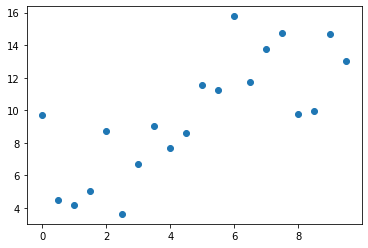

In [50]:
# Testing some ideas ... 

import numpy as np
import matplotlib.pyplot as plt

x1 = np.arange(0,10,0.5)
x2 = np.cos(x1)

x1_slope = 1
x2_slope = 2
intercept = 5

delta = np.random.uniform(-3,3, size=(len(x1)))

y = (x1_slope * x1) + (x2_slope * x2) + intercept + delta

plt.scatter(x1,y)
plt.show()

In [51]:
import statsmodels.formula.api as smf
import pandas as pd

df_test = pd.DataFrame()
df_test['x1'] = x1
df_test['x2'] = x2
df_test['y'] = y

formula = 'y ~ x1 + x2'
model = smf.ols(formula, data=df_test)
results = model.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.692
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     19.14
Date:                Thu, 17 Oct 2019   Prob (F-statistic):           4.44e-05
Time:                        21:55:01   Log-Likelihood:                -42.092
No. Observations:                  20   AIC:                             90.18
Df Residuals:                      17   BIC:                             93.17
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.7793      0.945      5.056      0.000       2.785       6.773
x1             1.0394      0.171      6.062      0.000       0.678       1.401
x2             1.7564      0.680      2.582      0.019       0.321       3.192
==============================================================================
Omnibus:                        3.568   Durbin-Watson:                   2.312
Prob(Omnibus):                  0.168   Jarque-Bera (JB):                1.334
Skew:                           0.056   Prob(JB):                        0.513
Kurtosis:                       1.740   Cond. No.                         11.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

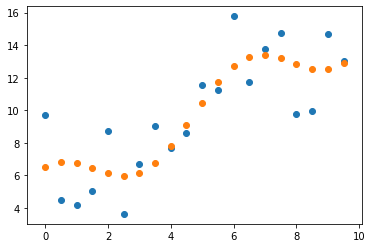

In [52]:
#predicted y values
ypred = results.predict(df_test) 
plt.scatter(x1,y)
plt.scatter(x1,ypred)
plt.show()

In [53]:
# Understanding the F-statistic:

# F tests the overall significance of the regression model: ratio of explained variance to 
# unexplained variance
F = results.mse_model/results.mse_resid
print('F =',F)
print('MSE model = ', results.mse_model) # Mean squared error the model.
print('MSE residuals = ', results.mse_resid) # Mean squared error of the residuals.

F = 19.136874179753413
MSE model =  88.71890578839916
MSE residuals =  4.636018659842719


In [54]:
#EXPLAINED VARIANCE

# Mean squared error the model.
# mean squares for model = mean regression sum of squares 
# = estimated sum of squares / DF model

ess = np.sum((np.array(ypred)-np.mean(y))**2.)
MSM = ess/results.df_model
print(MSM)

88.71890578839913


In [55]:
#UNEXPLAINED VARIANCE

# Mean squared error of the residuals
# = residual sum of squares / DF residuals

MSR = np.sum(results.resid**2.)/results.df_resid
print(MSR)

4.636018659842719


In [56]:
# Understanding R-squared
# R-squared is the amount of the variance in the dependent variable that is predictable from 
# the independent variable
Rsqcalc = 1-(np.var(results.resid)/np.var(y))
print('R^2 = ',results.rsquared)
print('R^2_calc = ',Rsqcalc)


R^2 =  0.6924398922716433
R^2_calc =  0.6924398922716433


In [57]:
print('calculating F from R^2')
F=(results.rsquared/results.df_model)/((1-results.rsquared)/results.df_resid)
print('F = ',F)

calculating F from R^2
F =  19.136874179753413
